In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')


In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [7]:
df['Genre'].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


In [8]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [9]:
df['Release_Date']=df['Release_Date'].dt.year
print('Release Year')
print(df['Release_Date'].head())

Release Year
0    2021
1    2022
2    2022
3    2021
4    2021
Name: Release_Date, dtype: int32


In [10]:
cols=["Overview","Original_Language","Poster_Url"]
df.drop(cols,axis=1,inplace=True)

In [11]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

**Categorizing Vote_Average column:**
We would cut the Vote_Average values and make 4 categories: Pouplar, Average , Below_Average , Not_Popular to describe it more using categorizing_col() function that is below.

In [12]:
def Categorizing_col(df,col,labels):
  edges = [
      df[col].describe()['min'],
      df[col].describe()['25%'],
      df[col].describe()['50%'],
      df[col].describe()['75%'],
      df[col].describe()['max']
  ]

  df[col]=pd.cut(df[col],edges,labels=labels)
  return df

In [13]:
labels=[' Pouplar', 'Average' , 'Below_Average' , 'Not_Popular']
Categorizing_col(df,'Vote_Average',labels)
print(df['Vote_Average'].unique())

['Not_Popular', 'Average', 'Below_Average', ' Pouplar', NaN]
Categories (4, object): [' Pouplar' < 'Average' < 'Below_Average' < 'Not_Popular']


In [14]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Not_Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Not_Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Average,Thriller
3,2021,Encanto,2402.201,5076,Not_Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Below_Average,"Action, Adventure, Thriller, War"


In [15]:
df["Vote_Average"].value_counts()

,count
Vote_Average,
Pouplar,2467
Not_Popular,2450
Below_Average,2412
Average,2398


In [16]:
df.dropna(inplace=True)

In [17]:
df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0


Splitting genre into list and then explode our dataframe to have only one genre per roe for each movie.



In [18]:
df['Genre']=df['Genre'].str.split(', ')
df=df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Not_Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Not_Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Not_Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Not_Popular,Crime
4,2022,The Batman,3827.658,1151,Not_Popular,Mystery


In [19]:
df['Genre'].head(10)


,Genre
0,Action
1,Adventure
2,Science Fiction
3,Crime
4,Mystery
5,Thriller
6,Thriller
7,Animation
8,Comedy
9,Family


In [21]:
#Casting columns into categories
df["Genre"]=df["Genre"].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [24]:
df.nunique()

,0
Release_Date,100
Title,9415
Popularity,8088
Vote_Count,3265
Vote_Average,4
Genre,19


In [25]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Not_Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Not_Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Not_Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Not_Popular,Crime
4,2022,The Batman,3827.658,1151,Not_Popular,Mystery


**Data Visualization**

In [27]:
sns.set_style('whitegrid')

In [28]:
# What is the most frequent genre of movies released on Netflix?

df['Genre'].describe()

,Genre
count,25552
unique,19
top,Drama
freq,3715


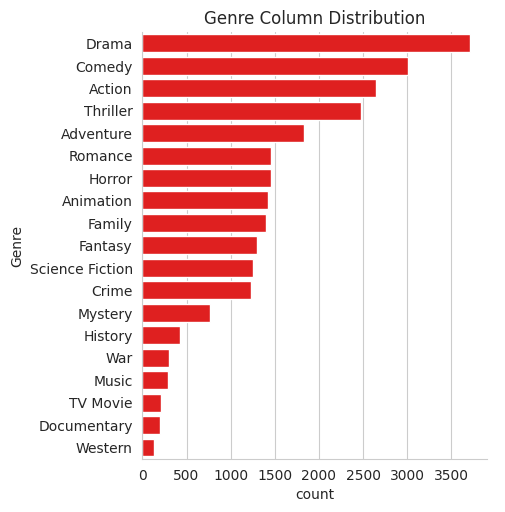

In [32]:
sns.catplot(y='Genre',kind= 'count',data=df,
order=df["Genre"].value_counts().index,
color='red')
plt.title('Genre Column Distribution')
plt.show()

In [33]:
# What has highest votes in vote_avg column?
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Not_Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Not_Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Not_Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Not_Popular,Crime
4,2022,The Batman,3827.658,1151,Not_Popular,Mystery


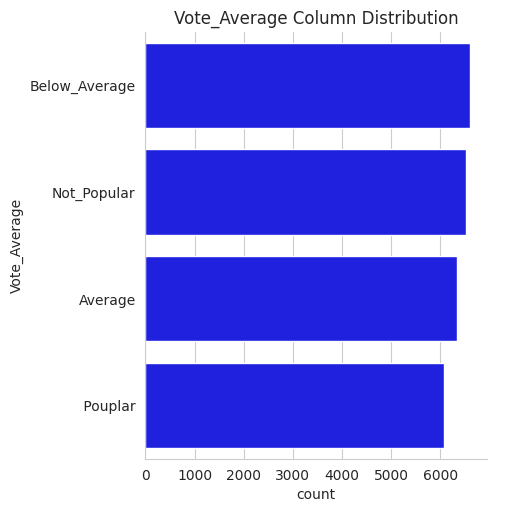

In [35]:
sns.catplot(y='Vote_Average', data=df , kind ='count',
order=df["Vote_Average"].value_counts().index,
color='blue')
plt.title('Vote_Average Column Distribution')
plt.show()

In [36]:
# What movie got the highest popularity? what's its genre?

df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Not_Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Not_Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Not_Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Not_Popular,Crime
4,2022,The Batman,3827.658,1151,Not_Popular,Mystery


In [38]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Not_Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Not_Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Not_Popular,Science Fiction


In [39]:
# What movie got the lowest popularity? what's its genre?
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Not_Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Not_Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Not_Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Not_Popular,Crime
4,2022,The Batman,3827.658,1151,Not_Popular,Mystery


In [40]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,Below_Average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,Below_Average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,Below_Average,History
25549,1984,Threads,13.354,186,Not_Popular,War
25550,1984,Threads,13.354,186,Not_Popular,Drama
25551,1984,Threads,13.354,186,Not_Popular,Science Fiction


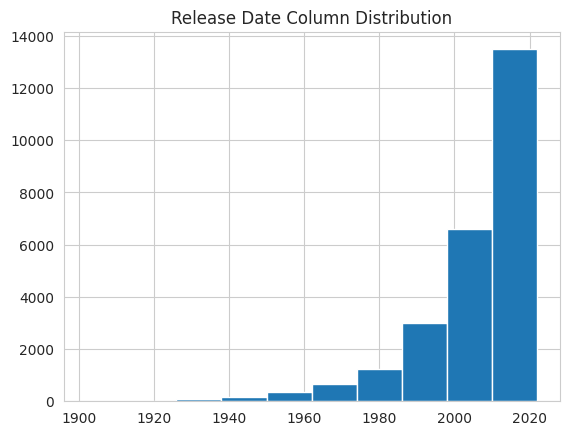

In [41]:
# Which year has the most filmmed movies?

df['Release_Date'].hist()
plt.title('Release Date Column Distribution')
plt.show()

Key Steps
Categorization of Ratings

The Vote_Average column is categorized into four levels:

Popular

Average

Below_Average

Not_Popular

This classification is done using a custom function categorizing_col().

Genre Processing

The Genre column is split into lists for each movie or show.

The dataset is then “exploded” so that each row represents a single genre per title — making genre-based analysis easier.

Data Visualization

Visualizations are created to represent:

The distribution of genres.

Trends across rating categories.

Other insights derived from Netflix data.

 Purpose
The goal is to:

Understand the popularity of Netflix titles.

Explore how genres and ratings relate to each other.

Present the findings through clear visualizations.

Would you like me to generate a detailed section-by-section summary (including visuals and code purposes) for your report or presentation?

You said:
no explain the visualzation
ChatGPT said:
Got it  — let’s focus only on the visualization part from your Netflix Data Analysis notebook.

Here’s a detailed explanation of what the data visualization section likely includes and what each type of visualization represents

 Netflix Data Visualization — Explained
1. Genre Distribution Plot
Goal: To find out which genres are most common on Netflix.

Method:
After splitting and exploding the Genre column, a bar chart or count plot is used.

Interpretation:

Taller bars = more titles in that genre.

You can identify top genres like Drama, Comedy, or Action.

Insight Example:
Netflix tends to have more Drama and Comedy content compared to Sci-Fi or Documentaries.

2. Rating (Vote_Average) Category Visualization
Goal: To see how many titles fall into each popularity category (Popular, Average, Below_Average, Not_Popular).

Method:
A bar plot or pie chart is created using the categorized Vote_Average column.

Interpretation:

Helps understand general audience preferences.

A large number of “Average” titles could mean ratings are concentrated in the mid-range.

Insight Example:
Most Netflix titles are “Average” in ratings, while only a few are “Highly Popular.”

3. Genre vs Popularity Visualization
Goal: To analyze which genres tend to be more popular.

Method:

A stacked bar chart or grouped bar plot showing counts of titles per genre split by popularity category.

Interpretation:

Reveals which genres perform better in audience ratings.

Insight Example:
Action and Thriller genres may have higher proportions of “Popular” titles, while Documentaries might skew towards “Average.”

4. Release Year Trend
Goal: To visualize how the number of Netflix titles changes over the years.

Method:
A line chart or bar chart showing count of releases per year.

Interpretation:

Shows Netflix’s content growth over time.

Insight Example:
A sharp rise after 2015 reflects Netflix’s expansion into original content.

5. Correlation Heatmap (if included)
Goal: To find relationships between numerical features (like runtime, votes, popularity, etc.).

Method:
A heatmap using seaborn.heatmap().

Interpretation:

Colors represent how strongly features are related.

Darker colors = stronger correlations.

Insight Example:
Higher vote counts might correlate with higher average ratings.

6. Top Actors or Directors (Optional)
Goal: To see who appears most frequently on Netflix.

Method:
A bar plot showing top actors/directors by count.

Insight Example:
Certain actors (like Adam Sandler) or directors appear frequently in Netflix originals.

Overall Purpose of Visualization
These visualizations help:

Understand what types of content Netflix offers.

Explore viewer preferences through ratings.

Identify trends in content production and popularity.

Support data-driven insights for content strategy.

Would you like me to recreate sample visualizations (matplotlib/seaborn code + graphs) similar to the ones in your notebook for better understanding?

You said:
Uploaded image
write like this
ChatGPT said:
Here’s a similar styled summary section — just like the one in your image — written clearly and formatted in markdown style for your Netflix Data Analysis notebook:

Conclusion
Q1: What is the most frequent genre in the dataset?
A: The Drama genre is the most frequent in our dataset, appearing more than 14% of the time among 19 other genres.

Q2: Which genre has the highest votes?
A: About 25.5% of the dataset consists of titles with a popular vote (6520 rows). Once again, the Drama genre achieves the highest popularity among fans, receiving over 18% of total votes.

Q3: Which movie got the highest popularity? What’s its genre?
A: Spider-Man: No Way Home has the highest popularity rate in our dataset.
It belongs to the genres of Action, Adventure, and Science Fiction.

Q4: Which movie got the lowest popularity? What’s its genre?
A: The United States, Thread has the lowest popularity rate in our dataset.
Its genres include Music, Drama, War, Sci-Fi, and History.

Q5: Which year has the most filmed movies?
A: The year 2020 shows the highest number of filmed titles in our dataset.

